### In this simple assignment, you will experiment with a toy dataset – the iris dataset

> a) Load the Iris dataset (2 points)

In [190]:
 # Import datasets library from sklearn and load the iris dataset

from sklearn import datasets
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

iris=datasets.load_iris()

In [191]:
# Reading the Data and Target values to x and y
# Reading the target names to ynames

inputData=iris.data
target=iris.target
targetNames=iris.target_names


### As per documentation, Iris dataset has 4 input columns. 
> <b> Input Columns </b> [Sepal Length, Sepal Width, Petal Length, Petal Width]

> <b> Target Names </b> ['setosa', 'versicolor', 'virginica']

> Setosa : 0
> Versicolor : 1
> Virginica : 2, is how the Tagret names are encoded


> (b) The Iris data has 3 classes. For the purposes of this assignment,
you will modify the dataset so that it has 2 classes – specifically,
you will merge the “setosa and the versicolor” classes (2 points)

In [192]:
# Filtering out the values with value 0 and 1 and encoding them as 1 , ie combining the classes
# Encoding Setosa and Versicolor as 0 and Virginica as 1
target[(target==0) | (target==1)]=0
target[target==2]=1

> (c) Construct a training set and a testing set using an 80 −20 split
using random sampling (3 points) 

In [266]:
# Creating an index to shuffle data and shuffling data using it
indexList=[i for i in range(0,inputData.shape[0])]
inputDistribution=(len(target[target==0])/len(target[target==1]))
trainDistribution=0
testDistribution=0
# This loop ensures that the distribution of train and test dataset is same as that of input distribution

np.random.shuffle(indexList)
splitLength=int(len(inputData)*0.8)
trainIndex=indexList[0:splitLength]
testIndex=indexList[splitLength:]

X_train=inputData[trainIndex]
Y_train=target[trainIndex]
X_test=inputData[testIndex]
Y_test=target[testIndex]
trainDistribution=len(Y_train[Y_train==0])/len(Y_train[Y_train==1])
testDistribution=len(Y_test[Y_test==0])/len(Y_test[Y_test==1])

Class0/Class1 ration in input data:  2.0
Class0/Class1 ration in train data:  1.9268292682926829
Class0/Class1 ration in train data:  2.3333333333333335


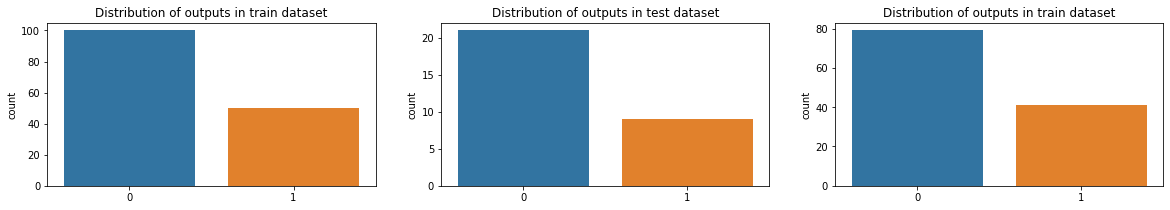

In [267]:
#Distribution of targets in train and test datasets
plt.figure(figsize=(20,3))

#Distribution in Main dataset
plt.subplot(1,3,1)
plt.title('Distribution of outputs in train dataset')
sns.countplot(target)

plt.subplot(1,3,2)
plt.title('Distribution of outputs in test dataset')
sns.countplot(Y_test)

plt.subplot(1,3,3)
plt.title('Distribution of outputs in train dataset')
sns.countplot(Y_train)

print('Class0/Class1 ration in input data: ',len(target[target==0])/len(target[target==1]))
print('Class0/Class1 ration in train data: ',len(Y_train[Y_train==0])/len(Y_train[Y_train==1]))
print('Class0/Class1 ration in train data: ',len(Y_test[Y_test==0])/len(Y_test[Y_test==1]))

## It can be seen that the distribution varies while doing random sampling. 
## Hence adding an additional code to ensure that the distribution is same throughout

In [264]:
# Creating an index to shuffle data and shuffling data using it
indexList=[i for i in range(0,inputData.shape[0])]
inputDistribution=(len(target[target==0])/len(target[target==1]))
trainDistribution=0
testDistribution=0
# This loop ensures that the distribution of train and test dataset is same as that of input distribution

while( (inputDistribution!=trainDistribution) & (inputDistribution!=testDistribution)):
    np.random.shuffle(indexList)
    splitLength=int(len(inputData)*0.8)
    trainIndex=indexList[0:splitLength]
    testIndex=indexList[splitLength:]

    X_trainCorrected=inputData[trainIndex]
    Y_trainCorrected=target[trainIndex]
    X_testCorrected=inputData[testIndex]
    Y_testCorrected=target[testIndex]
    trainDistribution=len(Y_train[Y_train==0])/len(Y_train[Y_train==1])
    testDistribution=len(Y_test[Y_test==0])/len(Y_test[Y_test==1])

Class0/Class1 ration in input data:  2.0
Class0/Class1 ration in train data:  2.0
Class0/Class1 ration in train data:  2.0


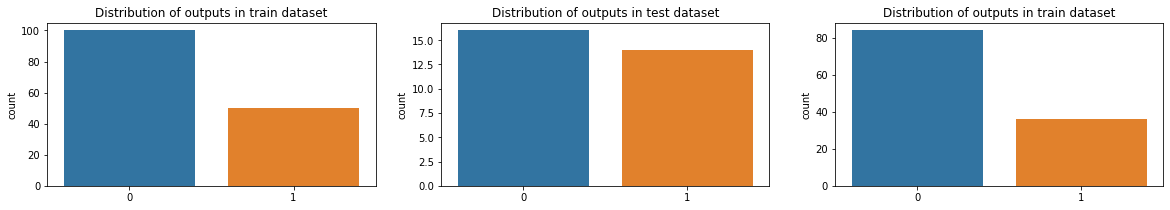

In [265]:
#Distribution of targets in train and test datasets
plt.figure(figsize=(20,3))

#Distribution in Main dataset
plt.subplot(1,3,1)
plt.title('Distribution of outputs in train dataset')
sns.countplot(target)

plt.subplot(1,3,2)
plt.title('Distribution of outputs in test dataset')
sns.countplot(Y_testCorrected)

plt.subplot(1,3,3)
plt.title('Distribution of outputs in train dataset')
sns.countplot(Y_trainCorrected)

print('Class0/Class1 ration in input data: ',len(target[target==0])/len(target[target==1]))
print('Class0/Class1 ration in train data: ',len(Y_train[Y_train==0])/len(Y_train[Y_train==1]))
print('Class0/Class1 ration in train data: ',len(Y_test[Y_test==0])/len(Y_test[Y_test==1]))

## The distribution of the train and test matches with the distribution of the input data. We will be evaluating the result using both the datasets

> (d) Use Logistic Regression as a “black-box” classifier and asses the
performance (4 points)

In [212]:
def createConfusionMatrix(predicted,target):
    trueNegative=0
    truePositive=0
    falsePositive=0
    falseNegative=0
    for prediction,actual in zip(predicted,target):
        if (prediction==0) & (actual==0):
            trueNegative+=1
        elif (prediction==0) & (actual==1):
            falsePositive+=1
        elif (prediction==1) & (actual==0):
            falseNegative+=1
        elif (prediction==1) & (actual==1):
            truePositive+=1
    confusionMatrix=[[truePositive,falseNegative],[falsePositive,trueNegative]]
    return confusionMatrix
            

In [256]:
def CrossEntropyLossFunction(predicted,actual):
    import math
    loss=0
    temp=[]
    if len(predicted)==len(actual):
        for i in range(len(predicted)):
            loss+=-((actual[i]*math.log2(predicted[i]))+((1-actual[i])*math.log2(1-predicted[i])))
           
        loss/=len(predicted)
    return loss


<AxesSubplot:title={'center':'Confusion Matrix on Test Data'}>

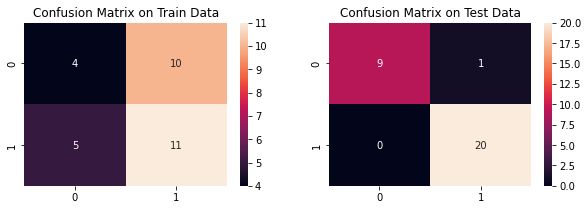

In [268]:
lr=LogisticRegression()

# Applying Logistic Regression on the unbalanced Dataset
lr.fit(X_train,Y_train)
Y_train_predicted=lr.predict(X_train)
Y_test_predicted=lr.predict(X_test)

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title('Confusion Matrix on Train Data')
confusionTrain=createConfusionMatrix(Y_train_predicted,Y_test)
sns.heatmap(confusionTrain,annot=True)

plt.subplot(1,2,2)
plt.title('Confusion Matrix on Test Data')
confusionTrain=createConfusionMatrix(Y_test_predicted,Y_test)
sns.heatmap(confusionTrain,annot=True)

In [272]:
lr.score(X_train,Y_train)

0.975

In [273]:
lr.score(X_test,Y_test)

0.9666666666666667

In [270]:
symmetricLossFunction(Y_train_predicted,Y_train)

3

In [271]:
symmetricLossFunction(Y_test_predicted,Y_test)

1